In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector
import tensorflow as tf
from tensorflow.keras import layers, Model
import keras
from keras.layers import Input, Dense, LSTM, Concatenate, Reshape, Lambda, SimpleRNN
from keras.models import Model
from keras.utils import to_categorical
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#add home advantage
#add bet odd
#complete the last function

In [2]:
database = mysql.connector.connect(host = 'localhost' ,user = 'root' ,password = 'Nhungchurong123@', database = 'database_with_lineup_08_16')

cur = database.cursor()
query = "select * from match_data"
cur.execute(query)
data_match = cur.fetchall()
df_match = pd.DataFrame(data_match)
df_match.columns = [str(i) for i in range(len(df_match.columns))]


In [5]:
keeping_column = ['0','1','2','3','4','5','6','7','8','9','10','55','56','57','58','59','60','61','62','63',
                  '64','65','66','67','68','69','70','71','72','73','74','75','76']
df_match_filtered = df_match.loc[:,keeping_column].reset_index()
df_match_filtered['home_constantly_appear_frct'] = None
df_match_filtered['home_constantly_appear_frct'] = None
df_match_filtered['away_constantly_appear_frct'] = None
df_match_filtered['away_constantly_appear_frct'] = None
df_match_filtered['home_tiredness'] = None
df_match_filtered['away_tiredness'] = None
df_match_filtered['home_winning_motivation'] = None
df_match_filtered['away_winning_motivation'] = None
df_match_filtered['home_w_streak'] = None
df_match_filtered['home_unb_streak'] = None
df_match_filtered['home_l_streak'] = None
df_match_filtered['home_unw_streak'] = None
df_match_filtered['away_w_streak'] = None
df_match_filtered['away_unb_streak'] = None
df_match_filtered['away_l_streak'] = None
df_match_filtered['away_unw_streak'] = None
df_match_filtered['Rating_predicted_goal_diff'] = None
df_match_filtered['Real_goal_diff'] = None
df_match_filtered['home_form'] = None
df_match_filtered['past_home_form'] = None
df_match_filtered['away_form'] = None
df_match_filtered['past_away_form'] = None
df_match_filtered['input_home_team'] = None
df_match_filtered['input_away_team'] = None
#need to add column

In [7]:
df_match_filtered_rating_training = df_match_filtered.loc[df_match_filtered['3'] == '2008/2009']
df_match_filtered_training = df_match_filtered.loc[df_match_filtered['3'].isin(['2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014'])]
df_match_filtered_dev = df_match_filtered.loc[df_match_filtered['3'] == '2014/2015']
df_match_filtered_test = df_match_filtered.loc[df_match_filtered['3'] == '2015/2016']

In [9]:
df_match_filtered_rating_training = df_match_filtered_rating_training.sort_values(by = '5').reset_index()
df_match_filtered_training = df_match_filtered_training.sort_values(by = '5').reset_index()
df_match_filtered_dev = df_match_filtered_dev.sort_values(by = '5').reset_index()
df_match_filtered_test = df_match_filtered_test.sort_values(by = '5').reset_index()


In [11]:
database = mysql.connector.connect(host = 'localhost' ,user = 'root' ,password = 'Nhungchurong123@', database = 'database_with_lineup_08_16')

cur = database.cursor()
query = "select * from team"
cur.execute(query)
data_team = cur.fetchall()
df_storage = pd.DataFrame(data_team)
df_storage.columns = [str(i) for i in range(len(df_storage.columns))]

In [13]:
keeping_column_df_storage = ['1', '3']
df_storage_filtered = df_storage.loc[:,keeping_column_df_storage]
df_storage_filtered = df_storage_filtered.rename(columns={'1': 'teamID', '3': 'team_name'})
df_storage_filtered['3'] = '0.227967'
df_storage_filtered['4'] = '0.227967'
df_storage_filtered['5'] = 'first_registered'
df_storage_filtered['6'] = 3.5

In [15]:
%run rating_goal_diff_normal_dist_data.ipynb

In [17]:
calculating_algorithm(df_match_filtered_rating_training, df_storage_filtered, 0.227967, epilson = 0.5, b = 1.5, c = 0.03, threshold_variance = 0.7, gamma = 1/3, delta = 3)

0.012837224705172215
0.025305865264770258
0.012837224705172215
0.012837224705172215
0.0032450548131472763
0.028367883697061697
0.019116290447073237
0.020982442918419372
0.01724208454764564
0.0006509536295954433
0.011570443597278159
0.00453631785132268
0.030802048772267894
0.0025979807199083067
0.054995861529141946
0.0344279050254035
0.0038911662369105725
0.02222210450770637
0.0013009330204181678
0.03802374004515848
0
0.012837224705172215
0.012837224705172215
0
0.012837224705172215
0.012837224705172215
0.012837224705172215
0.012837224705172215
0.012837224705172215
0.012837224705172215
0
0.025305865264770258
0
0
0.012837224705172215
0.012837224705172215
0.012837224705172215
0.012837224705172215
0.019739232674705738
0.025305865264770258
0.019739232674705183
0.039215765903950324
0
0
0.037426497940623665
0.03019478535675142
0.0019499410842680343
0.012837224705172215
0.025305865264770258
0.048053173115609395
0.012837224705172215
0
0.031408464251624565
0.012837224705172215
0.03742649794062366

In [18]:
df_storage_filtered_t1 = df_storage_filtered.copy()
df_storage_filtered_t2 = df_storage_filtered.copy()
df_storage_filtered_t3 = df_storage_filtered.copy()
df_storage_filtered_t4 = df_storage_filtered.copy()

In [19]:
get_data(df_match_filtered_training, df_storage_filtered_t1, 0.227967, epilson = 0.5, b = 1.5, c = 0.03, threshold_variance = 0.7, gamma = 1/3, delta = 3)

[95231.0, 67396.0, 22096.0, 37383.0, 95233.0, 25797.0, 8777.0, 25823.0, 92094.0, 41602.0, 41607.0]
1
[42231.0, 25793.0, 25790.0, 114789.0, 25782.0, 45308.0, 113227.0, 42237.0, 7616.0, 34075.0, 39559.0]
1
[39420.0, 8837.0, 11747.0, 92507.0, 114792.0, 74468.0, 42287.0, 39984.0, 41726.0, 30939.0, 41424.0]
1
[31470.0, 121080.0, 41717.0, 36785.0, 95212.0, 92260.0, 119702.0, 112976.0, 25816.0, 39136.0, 41308.0]
1
[25947.0, 108521.0, 114715.0, 150007.0, 25843.0, 42263.0, 41116.0, 41616.0, 79187.0, 34082.0, 42121.0]
0.0
[66902.0, 176302.0, 26065.0, 38626.0, 94017.0, 25952.0, 139634.0, 92095.0, 67306.0, 25860.0, 115160.0]
0.0
[34485.0, 176299.0, 66929.0, 42221.0, 40536.0, 42232.0, 165599.0, 34413.0, 91984.0, 18644.0, 36025.0]
0.0
[39420.0, 25802.0, 11747.0, 92507.0, 114792.0, 35417.0, 42287.0, 39984.0, 74468.0, 30939.0, 41424.0]
0.0
[41618.0, 92024.0, 92026.0, 7681.0, 41711.0, 25840.0, 25794.0, 25837.0, 30863.0, 66890.0, 93223.0]
0.0
[10637.0, 37844.0, 42114.0, 34067.0, 26193.0, 95217.0, 132843

In [20]:
get_data(df_match_filtered_dev, df_storage_filtered_t1, 0.227967, epilson = 0.5, b = 1.5, c = 0.03, threshold_variance = 0.7, gamma = 1/3, delta = 3)

[114270.0, 13515.0, 94260.0, 93261.0, 72256.0, 179071.0, 69223.0, 40159.0, 69238.0, nan, 12307.0]
1
[12340.0, 69266.0, 69374.0, 68744.0, 429847.0, 115253.0, 69346.0, 69252.0, 108179.0, 173393.0, 12283.0]
1
[17869.0, 69030.0, 93431.0, 555646.0, 198099.0, 9086.0, 46784.0, 190366.0, 555649.0, 14658.0, 196185.0]
1
[277487.0, 281840.0, 69553.0, 69261.0, nan, 249550.0, 79241.0, 131980.0, 361714.0, 429893.0, 179311.0]
1
[132814.0, 95213.0, 306206.0, 79985.0, 25835.0, 41602.0, 186524.0, 103846.0, 67003.0, 67360.0, 30919.0]
1
[25779.0, 45780.0, 25792.0, nan, 158886.0, 308309.0, 180076.0, 67333.0, 66933.0, 35831.0, 72628.0]
1
[41722.0, 121080.0, 197757.0, 260964.0, 543288.0, 41116.0, 113235.0, 78410.0, 31100.0, 42262.0, 108525.0]
1
[249057.0, 522276.0, 68732.0, 13554.0, 77778.0, 172896.0, 181227.0, 30975.0, 275992.0, 176704.0, 179818.0]
1
[114822.0, 68827.0, nan, 69280.0, 245423.0, 463925.0, 214977.0, 13425.0, 275771.0, 264743.0, 522116.0]
1
[42276.0, 114792.0, 150007.0, 42294.0, 141704.0, 13280

In [81]:
target = pd.DataFrame({'Class':[]})
for index, row in concat_df.iterrows():
    if concat_df.loc[index, 'Real_goal_diff'] == 0:
        update_value = 'class_0'
    elif concat_df.loc[index, 'Real_goal_diff'] == 1:
        update_value = 'class_1'
    elif concat_df.loc[index, 'Real_goal_diff'] >= 2:
        update_value = 'class_3'
    elif concat_df.loc[index, 'Real_goal_diff'] == -1:
        update_value = 'class_2'
    elif concat_df.loc[index, 'Real_goal_diff'] <= -2:
        update_value = 'class_5'

    concat_df.loc[index, 'Class'] = update_value

    update_frame = pd.DataFrame({'Class':[update_value]})
    target = pd.concat([target, update_frame])
        

In [281]:
df_match_filtered_dev['Class'] = df_match_filtered_dev['Real_goal_diff'].apply(
    lambda x: 'class_0' if x == 0 else 
              'class_1' if x == 1 else 
              'class_3' if x >= 2 else 
              'class_2' if x == -1 else 
              'class_5'
)

dev_tar = df_match_filtered_dev['Class'].copy()
 

In [ ]:
#a1 prepare dataset

In [62]:
df_match_filtered_training = df_match_filtered_training.reset_index(drop = True)

In [ ]:
#supporting function















In [29]:
def create_dataframes(balanced_df):
    batch_frame = {}
    
    for index, row in balanced_df.iterrows():
        home_id = row['7']
        away_id = row['8']
        
        if home_id not in batch_frame:
            batch_frame[home_id] = []
        if away_id not in batch_frame:
            batch_frame[away_id] = []
        
        batch_frame[home_id].append(row)
        batch_frame[away_id].append(row)

    dataframes = {}
    
    for key, value in batch_frame.items():
        dataframes[key] = pd.DataFrame(value)
        
    for key in dataframes:
        dataframes[key] = dataframes[key].sort_values(by='5', ascending=True).reset_index(drop=True)
    
    return dataframes


In [227]:
def get_next_match(teamID, matchID):
    matchID = int(matchID)
    if teamID in dataframes:
        frame = dataframes[teamID]
        
        try:
            # Get the index of the first occurrence of matchID
            match_index = frame.index[frame['6'] == matchID][0]  # Take the first match only
            # Check if there's a next match
            if match_index + 1 < len(frame):
                next_match_index = match_index + 1
                next_match = frame.iloc[next_match_index]
                return next_match_index
            else:
                return None  # Indicate there's no next match
                
        except IndexError:
            raise ValueError(f"Match ID {matchID} not found for team {teamID}.")
    else:
        raise ValueError(f"Team ID {teamID} not found in dataframes.")

In [506]:
def append_to_frame(df_train_join, dataframes):
    for index, row in df_train_join.iterrows():
        hometeamID = row['7']
        awayteamID = row['8']
        matchID = row['6']
        row_to_append = row.iloc[-6:].copy()  # Copy to avoid modifying original row
        away_row_to_append = row_to_append.copy()
        
        if row_to_append['Class'] == 'class_0':
            away_row_to_append['Class'] = 'class_0'
        elif row_to_append['Class'] == 'class_2':
            away_row_to_append['Class'] = 'class_1'
        elif row_to_append['Class'] == 'class_1':
            away_row_to_append['Class'] = 'class_2'
        elif row_to_append['Class'] == 'class_4':
            away_row_to_append['Class'] = 'class_3'
        else:
            away_row_to_append['Class'] = 'class_4'
      
        # Home team: Append values to home team's DataFrame
        try:
            home_match_index = get_next_match(hometeamID, matchID)
            if home_match_index is not None:
                for col_name, value in row_to_append.items():
                    col_name = f"home_{col_name}"
                    if col_name not in dataframes[hometeamID].columns:
                        dataframes[hometeamID][col_name] = np.nan
                    # Ensure value is scalar before assignment
                    if isinstance(value, (str, int, float)):
                        dataframes[hometeamID].at[home_match_index, col_name] = value
                    else:
                        print(f"Warning: Value for {col_name} is not scalar: {value}")
        except ValueError as e:
            print(f"Error with home team {hometeamID}: {e}")
        
        # Away team: Append values to away team's DataFrame
        try:
            away_match_index = get_next_match(awayteamID, matchID)
            if away_match_index is not None:
                for col_name, value in away_row_to_append.items():
                    col_name = f"away_{col_name}"
                    if col_name not in dataframes[awayteamID].columns:
                        dataframes[awayteamID][col_name] = np.nan
                    # Ensure value is scalar before assignment
                    if isinstance(value, (str, int, float)):
                        dataframes[awayteamID].at[away_match_index, col_name] = value
                    else:
                        print(f"Warning: Value for {col_name} is not scalar: {value}")
        except ValueError as e:
            print(f"Error with away team {awayteamID}: {e}")

In [35]:
def get_additional_data(df_train_join):
    # Calculate weighted expected points and goal differences for the home team
    df_train_join['home_Weighted_expected_last_point'] = (
        df_train_join['home_class_1_prob'] * 3 +
        df_train_join['home_class_3_prob'] * 3 +
        df_train_join['home_class_0_prob'] * 1
    )
    df_train_join['home_Weighted_expected_last_goal_diff'] = (
        df_train_join['home_class_1_prob'] * 1 +
        df_train_join['home_class_3_prob'] * 2 +
        df_train_join['home_class_2_prob'] * -1 +
        df_train_join['home_class_4_prob'] * -2
    )
    
    # Calculate expected points and goal differentials based on the highest probability class for the home team
    home_max_class = df_train_join[['home_class_0_prob', 'home_class_1_prob', 'home_class_2_prob', 'home_class_3_prob', 'home_class_4_prob']].idxmax(axis=1)
    
    df_train_join['home_Expected_last_point'] = home_max_class.map({
        'home_class_0_prob': 1,
        'home_class_1_prob': 3,
        'home_class_2_prob': 0,
        'home_class_3_prob': 3,
        'home_class_4_prob': 0
    })
    df_train_join['home_Expected_last_goal_diff'] = home_max_class.map({
        'home_class_0_prob': 0,
        'home_class_1_prob': 1,
        'home_class_2_prob': -1,
        'home_class_3_prob': 2,
        'home_class_4_prob': -2
    })
    
    # Calculate weighted expected points and goal differences for the away team
    df_train_join['away_Weighted_expected_last_point'] = (
        df_train_join['away_class_1_prob'] * 3 +
        df_train_join['away_class_3_prob'] * 3 +
        df_train_join['away_class_0_prob'] * 1
    )
    df_train_join['away_Weighted_expected_last_goal_diff'] = (
        df_train_join['away_class_1_prob'] * 1 +
        df_train_join['away_class_3_prob'] * 2 +
        df_train_join['away_class_2_prob'] * -1 +
        df_train_join['away_class_4_prob'] * -2
    )
    
    # Calculate expected points and goal differentials based on the highest probability class for the away team
    away_max_class = df_train_join[['away_class_0_prob', 'away_class_1_prob', 'away_class_2_prob', 'away_class_3_prob', 'away_class_4_prob']].idxmax(axis=1)
    
    df_train_join['away_Expected_last_point'] = away_max_class.map({
        'away_class_0_prob': 1,
        'away_class_1_prob': 3,
        'away_class_2_prob': 0,
        'away_class_3_prob': 3,
        'away_class_4_prob': 0
    })
    df_train_join['away_Expected_last_goal_diff'] = away_max_class.map({
        'away_class_0_prob': 0,
        'away_class_1_prob': 1,
        'away_class_2_prob': -1,
        'away_class_3_prob': 2,
        'away_class_4_prob': -2
    })
    
    return df_train_join

In [37]:
def merge_and_remove_redundant(df):
    # Create an aggregation dictionary for all columns except '6'
    aggregation_dict = {col: 'first' for col in df.columns if col != '6'}  # Aggregating other columns
    
    # Perform the aggregation without the '6' column
    df_merged = df.groupby('6').agg(aggregation_dict).reset_index()
    
    # Now include the '6' column by using its value from the first row
    df_merged['6'] = df.groupby('6')['6'].first().reset_index(drop=True)
    
    # Remove redundant rows if any
    df_merged = df_merged.drop_duplicates(subset='6', keep='first')
    
    return df_merged


In [39]:
def get_real_last_result(df_train_join):
    # Define the point mapping for classes
    point_mapping = {
        'class_0': 1,
        'class_1': 3,
        'class_2': 0,
        'class_3': 3,
        'class_4': 0
    }

    goal_diff_mapping = {
        'class_0': 0,
        'class_1': 1,
        'class_2': -1,
        'class_3': 2,
        'class_4': -2
    }
    # Apply the mapping to both `away_Class` and `home_Class` columns
    df_train_join['away_last_point'] = df_train_join['away_Class'].map(point_mapping)
    df_train_join['home_last_point'] = df_train_join['home_Class'].map(point_mapping)

    df_train_join['away_last_goal_diff'] = df_train_join['away_Class'].map(goal_diff_mapping)
    df_train_join['home_last_goal_diff'] = df_train_join['home_Class'].map(goal_diff_mapping)
    
    return df_train_join

In [41]:
def last_match_toughness(df_train_join):
    x = sp.symbols('x')
    sigma = 1 / np.sqrt(2 * np.pi)  # Adjusted standard deviation
    expr = (1 / (sigma * sp.sqrt(2 * sp.pi))) * sp.exp(-((x)**2) / (2 * sigma**2))
    func = sp.lambdify(x, expr)  # Correctly define the lambda function for x

    for index, match in df_train_join.iterrows():
        home_input = match['home_last_goal_diff']
        home_val = func(home_input)

        away_input = match['away_last_goal_diff']
        away_val = func(away_input)

        df_train_join.loc[index, 'home_last_match_toughness'] = home_val
        df_train_join.loc[index, 'away_last_match_toughness'] = away_val

In [ ]:
#Dataset/ Frames preparation






In [45]:
concat_df = pd.concat([df_match_filtered_training, df_match_filtered_dev], ignore_index=True)

In [127]:
concat_df_fil = concat_df.drop('Class', axis = 1)
dataframes = create_dataframes(concat_df_fil)

In [53]:
target = pd.DataFrame({'Class':[]})
for index, row in df_match_filtered_training.iterrows():
    if df_match_filtered_training.loc[index, 'Real_goal_diff'] == 0:
        update_value = '0'
    elif df_match_filtered_training.loc[index, 'Real_goal_diff'] == 1:
        update_value = '1'
    elif df_match_filtered_training.loc[index, 'Real_goal_diff'] >= 2:
        update_value = '2'
    elif df_match_filtered_training.loc[index, 'Real_goal_diff'] == -1:
        update_value = '-1'
    elif df_match_filtered_training.loc[index, 'Real_goal_diff'] <= -2:
        update_value = '-2'

    df_match_filtered_training.loc[index, 'Class'] = update_value

    update_frame = pd.DataFrame({'Class':[update_value]})
    target = pd.concat([target, update_frame])
        

In [55]:
# Step 1: Find the minimum count for any unique value in the column
min_count = df_match_filtered_training['Class'].value_counts().min()

# Step 2: Sample rows for each value to match the minimum count
balanced_df = pd.concat([
    group.sample(min_count, random_state=1)
    for value, group in df_match_filtered_training.groupby('Class')
])

# Optional: Reset index if needed
balanced_df = balanced_df.reset_index(drop=True)
balanced_df = balanced_df.sort_values(by = '3')

target = balanced_df['Class'].copy()

In [ ]:
#Initial training








In [61]:
column_to_use_1 = ['home_constantly_appear_frct', 'away_constantly_appear_frct',
       'home_tiredness', 'away_tiredness', 'home_winning_motivation',
       'away_winning_motivation', 'home_w_streak', 'home_unb_streak',
       'home_l_streak', 'home_unw_streak', 'away_w_streak', 'away_unb_streak',
       'away_l_streak', 'away_unw_streak', 'Rating_predicted_goal_diff', 'home_recently_appear_frct',
       'away_recently_appear_frct', 'input_home_team', 'input_away_team']
input_a_column_1 = ['home_winning_motivation',
        'home_w_streak', 'home_unb_streak',
       'home_l_streak', 'home_unw_streak']
input_b_column_1 = ['home_tiredness', 'home_recently_appear_frct']
input_c_column_1 = ['home_constantly_appear_frct', 'home_recently_appear_frct']

input_d_column_1 = ['away_winning_motivation', 'away_w_streak', 'away_unb_streak',
       'away_l_streak', 'away_unw_streak']
input_e_column_1 = ['away_tiredness',  'away_recently_appear_frct']
input_f_column_1 = ['away_constantly_appear_frct', 'away_recently_appear_frct']
additional_input_column_1 = ['input_home_team', 'input_away_team']

In [63]:
balanced_df = balanced_df.reset_index(drop = True)
training_target = balanced_df['Class'].copy()
df_training = balanced_df.loc[:, column_to_use_1]
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
df_training = pd.DataFrame(scaler.fit_transform(df_training), columns=df_training.columns)


In [65]:
input_a = Input(shape=(5,), name='home_motivation')  # Input for the first network
input_b = Input(shape=(2,), name='home_tiredness')   # Input for the second network
input_c = Input(shape=(2,), name='home_form')        # Input for the third network
additional_input = Input(shape=(2,), name='rating')

# First sub-network
x_a = Dense(30, activation='relu')(input_a)
x_a1 = Dense(30, activation='relu')(x_a)
x_a2 = Dense(10, activation='relu')(x_a1)

# Second sub-network
x_b = Dense(20, activation='relu')(input_b)
x_b1 = Dense(20, activation='relu')(x_b)
x_b2 = Dense(7, activation='relu')(x_b1)

# Third sub-network
x_c = Dense(20, activation='relu')(input_c)
x_c1 = Dense(20, activation='relu')(x_c)
x_c2 = Dense(7, activation='relu')(x_c1)

# Additional inputs for away team
input_d = Input(shape=(5,), name='away_motivation')
input_e = Input(shape=(2,), name='away_tiredness')
input_f = Input(shape=(2,), name='away_form')

# First sub-network for away team
x_d = Dense(30, activation='relu')(input_d)
x_d1 = Dense(30, activation='relu')(x_d)
x_d2 = Dense(10, activation='relu')(x_d1)

# Second sub-network for away team
x_e = Dense(20, activation='relu')(input_e)
x_e1 = Dense(20, activation='relu')(x_e)
x_e2 = Dense(7, activation='relu')(x_e1)

# Third sub-network for away team
x_f = Dense(20, activation='relu')(input_f)
x_f1 = Dense(20, activation='relu')(x_f)
x_f2 = Dense(7, activation='relu')(x_f1)

# Concatenate the outputs of the three networks and additional input
merged = Concatenate()([x_a, x_b, x_c, x_d, x_e, x_f, additional_input])

# Final dense layers
hidden_1 = Dense(100, activation='relu')(merged)
hidden_2 = Dense(100, activation='relu')(hidden_1)
hidden_3 = Dense(100, activation='relu')(hidden_2)
hidden_4 = Dense(50, activation='relu')(hidden_3)

# Output layer
output = Dense(5, activation='softmax')(hidden_2)  # Adjust activation and units as needed

# Create the model
model_1 = Model(inputs=[input_a, input_b, input_c, input_d, input_e, input_f, additional_input], outputs=output)

# Compile the model
model_1.compile(optimizer=Adam(learning_rate=0.001, clipvalue=1.0), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ home_motivation (InputLayer)  │ (None, 5)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ home_tiredness (InputLayer)   │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ home_form (InputLayer)        │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ away_motivation (InputLayer)  │ (None, 5)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ away_tiredness (InputLayer)   │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ away_form (InputLayer)        │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 30)                │             180 │ home_motivation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 20)                │              60 │ home_tiredness[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 20)                │              60 │ home_form[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 30)                │             180 │ away_motivation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 20)                │              60 │ away_tiredness[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_15 (Dense)              │ (None, 20)                │              60 │ away_form[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rating (InputLayer)           │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 142)               │               0 │ dense[0][0],               │
│                               │                           │                 │ dense_3[0][0],             │
│                               │                           │                 │ dense_6[0][0],             │
│                               │                           │                 │ dense_9[0][0],             │
│                               │                           │                 │ dense_12[0][0],            │
│                               │                           │                 │ dense_15[0][0],            │
│                               │                           │                 │ rating[0][0]               │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,505 (99.63 KB)

 Trainable params: 25,505 (99.63 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
num_samples = len(df_training)
input_a_data = df_training.loc[:, input_a_column_1].values.astype(np.float32)
input_b_data = df_training.loc[:, input_b_column_1].values.astype(np.float32)
input_c_data = df_training.loc[:, input_c_column_1].values.astype(np.float32)
input_d_data = df_training.loc[:, input_d_column_1].values.astype(np.float32)
input_e_data = df_training.loc[:, input_e_column_1].values.astype(np.float32)
input_f_data = df_training.loc[:, input_f_column_1].values.astype(np.float32)


additional_input_data = df_training.loc[:, additional_input_column_1].values.astype(np.float32)
labels = training_target.values

train_size = int(0.8 * num_samples)
X_train = [
    input_a_data[:train_size], 
    input_b_data[:train_size], 
    input_c_data[:train_size], 
    input_d_data[:train_size],  # Include away motivation
    input_e_data[:train_size],  # Include away tiredness
    input_f_data[:train_size],  # Include away form
    additional_input_data[:train_size]  # Include additional input
]

X_val = [
    input_a_data[train_size:], 
    input_b_data[train_size:], 
    input_c_data[train_size:], 
    input_d_data[train_size:],  # Include away motivation
    input_e_data[train_size:],  # Include away tiredness
    input_f_data[train_size:],  # Include away form
    additional_input_data[train_size:]  # Include additional input
]

y_train = labels[:train_size]
y_val = labels[train_size:]

y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)

print("X_train shapes:")
for i, x in enumerate(X_train):
    print(f"Input {i}: {x.shape}, Type: {type(x)}")

print(f"y_train shape: {y_train.shape}, Type: {type(y_train)}")

print("X_val shapes:")
for i, x in enumerate(X_val):
    print(f"Input {i}: {x.shape}, Type: {type(x)}")

print(f"y_val shape: {y_val.shape}, Type: {type(y_val)}")

# Train the model
history = model_1.fit(
    X_train,            # List of inputs for the model
    y_train,            # Corresponding labels
    validation_data=(X_val, y_val),  # Optional: validation data
    epochs=30,          # Number of training epochs
    batch_size=32,      # Size of the batches used during training
    verbose=1           # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
)

# Optionally, evaluate the model on validation data
val_loss, val_accuracy = model_1.evaluate(X_val, y_val, verbose=0)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

X_all = [input_a_data, input_b_data, input_c_data, input_d_data, input_e_data, input_f_data, additional_input_data]

# Use the model to predict the probabilities on the combined dataset
predictions = model_1.predict(X_all)

# Optionally, store the predictions in a DataFrame
predicted_probabilities_df = pd.DataFrame(predictions, columns=[f'class_{i}_prob' for i in range(predictions.shape[1])])

# Display the predicted probabilities
print(predicted_probabilities_df.head())

X_train shapes:
Input 0: (8388, 5), Type: <class 'numpy.ndarray'>
Input 1: (8388, 2), Type: <class 'numpy.ndarray'>
Input 2: (8388, 2), Type: <class 'numpy.ndarray'>
Input 3: (8388, 5), Type: <class 'numpy.ndarray'>
Input 4: (8388, 2), Type: <class 'numpy.ndarray'>
Input 5: (8388, 2), Type: <class 'numpy.ndarray'>
Input 6: (8388, 2), Type: <class 'numpy.ndarray'>
y_train shape: (8388, 5), Type: <class 'numpy.ndarray'>
X_val shapes:
Input 0: (2097, 5), Type: <class 'numpy.ndarray'>
Input 1: (2097, 2), Type: <class 'numpy.ndarray'>
Input 2: (2097, 2), Type: <class 'numpy.ndarray'>
Input 3: (2097, 5), Type: <class 'numpy.ndarray'>
Input 4: (2097, 2), Type: <class 'numpy.ndarray'>
Input 5: (2097, 2), Type: <class 'numpy.ndarray'>
Input 6: (2097, 2), Type: <class 'numpy.ndarray'>
y_val shape: (2097, 5), Type: <class 'numpy.ndarray'>
Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3122 - loss: 1.5122 - val_accuracy: 0.2952 - val_loss: 1.5335
Epoch 2/30
263/263 ━━━━━━━━━━━━━

In [89]:
df_new_data = df_match_filtered_training.loc[:, column_to_use_1]
df_new_data = pd.DataFrame(scaler.fit_transform(df_new_data), columns=df_new_data.columns)

In [91]:
input_a_new_data = df_new_data.loc[:, input_a_column_1].values.astype(np.float32)
input_b_new_data = df_new_data.loc[:, input_b_column_1].values.astype(np.float32)
input_c_new_data = df_new_data.loc[:, input_c_column_1].values.astype(np.float32)
input_d_new_data = df_new_data.loc[:, input_d_column_1].values.astype(np.float32)
input_e_new_data = df_new_data.loc[:, input_e_column_1].values.astype(np.float32)
input_f_new_data = df_new_data.loc[:, input_f_column_1].values.astype(np.float32)
additional_input_new_data = df_new_data.loc[:, additional_input_column_1].values.astype(np.float32)

# Combine all inputs into a list for the model
X_new = [
    input_a_new_data,
    input_b_new_data,
    input_c_new_data,
    input_d_new_data,
    input_e_new_data,
    input_f_new_data,
    additional_input_new_data
]

# Make predictions
new_predictions = model_1.predict(X_new)

# Optionally, store the predictions in a DataFrame
predicted_probabilities_df = pd.DataFrame(new_predictions, columns=[f'class_{i}_prob' for i in range(new_predictions.shape[1])])

# Display the predicted probabilities
print(predicted_probabilities_df.head())

501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step
   class_0_prob  class_1_prob  class_2_prob  class_3_prob  class_4_prob
0      0.206433      0.227472      0.135033      0.209772      0.221289
1      0.199481      0.109289      0.103055      0.371300      0.216876
2      0.202346      0.261923      0.197655      0.101720      0.236356
3      0.215559      0.207423      0.122998      0.237844      0.216176
4      0.220922      0.238465      0.338069      0.060080      0.142464


In [495]:
concatenated_df_train = pd.concat([df_match_filtered_training, predicted_probabilities_df], axis=1)

In [497]:
for index, row in concatenated_df_train.iterrows():
    if row['Class'] == '1':
        concatenated_df_train.loc[index, 'Class'] = 'class_1'
    elif row['Class'] == '0':
        concatenated_df_train.loc[index, 'Class'] = 'class_0'
    elif row['Class'] == '-1':
        concatenated_df_train.loc[index, 'Class'] = 'class_3'
    elif row['Class'] == '2':
        concatenated_df_train.loc[index, 'Class'] = 'class_2'
    else:
        concatenated_df_train.loc[index, 'Class'] = 'class_4'

In [509]:
append_to_frame(concatenated_df_train, dataframes)

In [511]:
df_train_model_2 = pd.concat(dataframes.values(), ignore_index=True)

In [513]:
df_merged = merge_and_remove_redundant(df_train_model_2)

In [515]:
df_merged_train_model_2 = df_merged.loc[df_merged['3'].isin(['2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014'])]


In [517]:
df_merged_train_model_2_filtered = df_merged_train_model_2.dropna(subset=['home_class_0_prob', 'away_class_0_prob'])

In [415]:
# df_merged_train_model_2['home_class_0_prob'] = df_merged['home_class_0_prob'].fillna(0)
# df_merged_train_model_2['home_class_1_prob'] = df_merged['home_class_1_prob'].fillna(0)
# df_merged_train_model_2['home_class_2_prob'] = df_merged['home_class_2_prob'].fillna(0)
# df_merged_train_model_2['home_class_3_prob'] = df_merged['home_class_3_prob'].fillna(0)
# df_merged_train_model_2['home_class_4_prob'] = df_merged['home_class_4_prob'].fillna(0)
# df_merged_train_model_2['home_Class'] = df_merged['home_Class'].fillna('class_0')
# df_merged['Class'] = df_merged['Class'].replace(['-1', '-2', '2', '1', '0'], 'class_0')
# df_merged['away_class_0_prob'] = df_merged['away_class_0_prob'].fillna(0)
# df_merged['away_class_1_prob'] = df_merged['away_class_1_prob'].fillna(0)
# df_merged['away_class_2_prob'] = df_merged['away_class_2_prob'].fillna(0)
# df_merged['away_class_3_prob'] = df_merged['away_class_3_prob'].fillna(0)
# df_merged['away_class_4_prob'] = df_merged['away_class_4_prob'].fillna(0)
# df_merged['away_Class'] = df_merged['away_Class'].fillna('class_0')


In [519]:
get_additional_data(df_merged_train_model_2_filtered)

C:\Users\Minh\AppData\Local\Temp\ipykernel_105364\3493905063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_join['home_Weighted_expected_last_point'] = (
C:\Users\Minh\AppData\Local\Temp\ipykernel_105364\3493905063.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_join['home_Weighted_expected_last_goal_diff'] = (
C:\Users\Minh\AppData\Local\Temp\ipykernel_105364\3493905063.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,6,level_0,index,0,1,2,3,4,5,7,...,away_class_3_prob,away_class_4_prob,home_Weighted_expected_last_point,home_Weighted_expected_last_goal_diff,home_Expected_last_point,home_Expected_last_goal_diff,away_Weighted_expected_last_point,away_Weighted_expected_last_goal_diff,away_Expected_last_point,away_Expected_last_goal_diff
10,653895,5258,5258,5259,4769,4769,2009/2010,2,2009-08-16 00:00:00,4170,...,0.284743,0.001704,1.938267,0.685414,3,2,1.648946,0.550127,1,0
11,653896,5259,5259,5260,4769,4769,2009/2010,2,2009-08-15 00:00:00,8588,...,0.202304,0.002049,1.232695,-0.265643,3,1,1.480124,0.341369,1,0
12,653897,5260,5260,5261,4769,4769,2009/2010,2,2009-08-15 00:00:00,8689,...,0.100782,0.216128,1.718270,0.416999,3,2,1.311987,-0.172474,3,1
13,653898,5261,5261,5262,4769,4769,2009/2010,2,2009-08-15 00:00:00,9748,...,0.376408,0.195686,1.340928,-0.142953,3,1,1.756860,0.425804,3,2
14,653899,5262,5262,5263,4769,4769,2009/2010,2,2009-08-16 00:00:00,8592,...,0.485958,0.165508,1.311987,-0.172474,3,1,1.938267,0.685414,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,1686228,21020,21020,21021,19694,19694,2013/2014,38,2014-05-10 00:00:00,8426,...,0.142412,0.239241,1.408265,-0.139212,0,-2,1.436851,-0.092926,3,1
15998,1686229,21021,21021,21022,19694,19694,2013/2014,38,2014-05-10 00:00:00,9800,...,0.210986,0.183347,1.436851,-0.092926,3,1,1.677844,0.210400,3,1
15999,1686230,21022,21022,21023,19694,19694,2013/2014,38,2014-05-11 00:00:00,8485,...,0.141669,0.287815,1.400989,0.006711,3,2,1.331432,-0.205992,0,-2
16000,1686231,21023,21023,21024,19694,19694,2013/2014,38,2014-05-11 00:00:00,9925,...,0.568908,0.216608,1.331432,-0.205992,0,-2,2.032354,0.751562,3,2


In [523]:
get_real_last_result(df_merged_train_model_2_filtered)

C:\Users\Minh\AppData\Local\Temp\ipykernel_105364\1391001160.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_join['away_last_point'] = df_train_join['away_Class'].map(point_mapping)
C:\Users\Minh\AppData\Local\Temp\ipykernel_105364\1391001160.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_join['home_last_point'] = df_train_join['home_Class'].map(point_mapping)
C:\Users\Minh\AppData\Local\Temp\ipykernel_105364\1391001160.py:22: SettingWithCopyWarning: 
A value is trying to be set

,6,level_0,index,0,1,2,3,4,5,7,...,home_Expected_last_point,home_Expected_last_goal_diff,away_Weighted_expected_last_point,away_Weighted_expected_last_goal_diff,away_Expected_last_point,away_Expected_last_goal_diff,away_last_point,home_last_point,away_last_goal_diff,home_last_goal_diff
10,653895,5258,5258,5259,4769,4769,2009/2010,2,2009-08-16 00:00:00,4170,...,3,2,1.648946,0.550127,1,0,3,0,1,-2
11,653896,5259,5259,5260,4769,4769,2009/2010,2,2009-08-15 00:00:00,8588,...,3,1,1.480124,0.341369,1,0,3,3,1,2
12,653897,5260,5260,5261,4769,4769,2009/2010,2,2009-08-15 00:00:00,8689,...,3,2,1.311987,-0.172474,3,1,0,1,-2,0
13,653898,5261,5261,5262,4769,4769,2009/2010,2,2009-08-15 00:00:00,9748,...,3,1,1.756860,0.425804,3,2,1,0,0,-2
14,653899,5262,5262,5263,4769,4769,2009/2010,2,2009-08-16 00:00:00,8592,...,3,1,1.938267,0.685414,3,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,1686228,21020,21020,21021,19694,19694,2013/2014,38,2014-05-10 00:00:00,8426,...,0,-2,1.436851,-0.092926,3,1,3,3,2,1
15998,1686229,21021,21021,21022,19694,19694,2013/2014,38,2014-05-10 00:00:00,9800,...,3,1,1.677844,0.210400,3,1,0,0,-1,-2
15999,1686230,21022,21022,21023,19694,19694,2013/2014,38,2014-05-11 00:00:00,8485,...,3,2,1.331432,-0.205992,0,-2,3,3,2,1
16000,1686231,21023,21023,21024,19694,19694,2013/2014,38,2014-05-11 00:00:00,9925,...,0,-2,2.032354,0.751562,3,2,1,0,0,-2


In [525]:
last_match_toughness(df_merged_train_model_2_filtered)

C:\Users\Minh\AppData\Local\Temp\ipykernel_105364\2462108308.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_join.loc[index, 'home_last_match_toughness'] = home_val
C:\Users\Minh\AppData\Local\Temp\ipykernel_105364\2462108308.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_join.loc[index, 'away_last_match_toughness'] = away_val


In [529]:
# Step 1: Find the minimum count for any unique value in the column
min_count = df_merged_train_model_2_filtered['Class'].value_counts().min()

# Step 2: Sample rows for each value to match the minimum count
balanced_df_model_2 = pd.concat([
    group.sample(min_count, random_state=1)
    for value, group in df_merged_train_model_2_filtered.groupby('Class')
])

# Optional: Reset index if needed
balanced_df_model_2 = balanced_df_model_2.sort_values(by = '3')
balanced_df_model_2 = balanced_df_model_2.reset_index(drop=True)

In [573]:
# Initialize model_2_labels as an empty DataFrame
model_2_labels = pd.DataFrame(columns=['Class'])

for index, row in balanced_df_model_2.iterrows():
    if balanced_df_model_2.loc[index, 'Real_goal_diff'] == 0:
        update_value = '0'
    elif balanced_df_model_2.loc[index, 'Real_goal_diff'] == 1:
        update_value = '1'
    elif balanced_df_model_2.loc[index, 'Real_goal_diff'] >= 2:
        update_value = '2'
    elif balanced_df_model_2.loc[index, 'Real_goal_diff'] == -1:
        update_value = '-1'
    elif balanced_df_model_2.loc[index, 'Real_goal_diff'] <= -2:
        update_value = '-2'

    # Create a DataFrame with the update value
    update_frame = pd.DataFrame({'Class': [update_value]})

    # Concatenate update_frame with model_2_labels and reassign it
    model_2_labels = pd.concat([model_2_labels, update_frame], ignore_index=True)


In [ ]:
#Step 2:   Trainning RNN







In [533]:
column_to_use = ['home_constantly_appear_frct', 'away_constantly_appear_frct',
       'home_tiredness', 'away_tiredness', 'home_winning_motivation',
       'away_winning_motivation', 'home_w_streak', 'home_unb_streak',
       'home_l_streak', 'home_unw_streak', 'away_w_streak', 'away_unb_streak',
       'away_l_streak', 'away_unw_streak', 'Rating_predicted_goal_diff', 'home_recently_appear_frct',
       'away_recently_appear_frct', 'input_home_team', 'input_away_team', 'home_Weighted_expected_last_point',
       'home_Weighted_expected_last_goal_diff', 'home_Expected_last_point',
       'home_Expected_last_goal_diff', 'away_Weighted_expected_last_point',
       'away_Weighted_expected_last_goal_diff', 'away_Expected_last_point',
       'away_Expected_last_goal_diff', 'away_last_point', 'home_last_point', 'home_last_match_toughness', 'away_last_match_toughness']

input_a_column = ['home_winning_motivation',
        'home_w_streak', 'home_unb_streak',
       'home_l_streak', 'home_unw_streak']
input_b_column = ['home_tiredness', 'home_recently_appear_frct', 'home_last_match_toughness']
input_c_column = ['home_constantly_appear_frct', 'home_recently_appear_frct', 'home_Weighted_expected_last_point',
       'home_Weighted_expected_last_goal_diff', 'home_Expected_last_point',
       'home_Expected_last_goal_diff', 'home_last_point']

input_d_column = ['away_winning_motivation', 'away_w_streak', 'away_unb_streak',
       'away_l_streak', 'away_unw_streak']
input_e_column = ['away_tiredness',  'away_recently_appear_frct', 'away_last_match_toughness']
input_f_column = ['away_constantly_appear_frct', 'away_recently_appear_frct', 'away_Weighted_expected_last_point',
       'away_Weighted_expected_last_goal_diff', 'away_Expected_last_point',
       'away_Expected_last_goal_diff', 'away_last_point']
additional_input_column = ['input_home_team', 'input_away_team']

In [535]:
df_training_model_2 = balanced_df_model_2.loc[:, column_to_use]
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
df_training_model_2 = pd.DataFrame(scaler.fit_transform(df_training_model_2), columns=df_training_model_2.columns)


In [537]:
input_a = Input(shape=(5,), name='home_motivation')  # Input for the first network
input_b = Input(shape=(3,), name='home_tiredness')   # Input for the second network
input_c = Input(shape=(7,), name='home_form')        # Input for the third network
additional_input = Input(shape=(2,), name='rating')

# First sub-network
x_a = Dense(30, activation='relu')(input_a)
x_a1 = Dense(30, activation='relu')(x_a)
x_a2 = Dense(10, activation='relu')(x_a1)

# Second sub-network
x_b = Dense(20, activation='relu')(input_b)
x_b1 = Dense(20, activation='relu')(x_b)
x_b2 = Dense(7, activation='relu')(x_b1)

# Third sub-network
x_c = Dense(50, activation='relu')(input_c)
x_c1 = Dense(50, activation='relu')(x_c)
x_c2 = Dense(15, activation='relu')(x_c1)

# Additional inputs for away team
input_d = Input(shape=(5,), name='away_motivation')
input_e = Input(shape=(3,), name='away_tiredness')
input_f = Input(shape=(7,), name='away_form')

# First sub-network for away team
x_d = Dense(30, activation='relu')(input_d)
x_d1 = Dense(30, activation='relu')(x_d)
x_d2 = Dense(10, activation='relu')(x_d1)

# Second sub-network for away team
x_e = Dense(20, activation='relu')(input_e)
x_e1 = Dense(20, activation='relu')(x_e)
x_e2 = Dense(7, activation='relu')(x_e1)

# Third sub-network for away team
x_f = Dense(50, activation='relu')(input_f)
x_f1 = Dense(50, activation='relu')(x_f)
x_f2 = Dense(14, activation='relu')(x_f1)

# Concatenate the outputs of the three networks and additional input
merged = Concatenate()([x_a, x_b, x_c, x_d, x_e, x_f, additional_input])

# Final dense layers
hidden_1 = Dense(150, activation='relu')(merged)
hidden_2 = Dense(150, activation='relu')(hidden_1)
hidden_3 = Dense(150, activation='relu')(hidden_2)
hidden_4 = Dense(150, activation='relu')(hidden_3)

# Output layer
output = Dense(5, activation='softmax')(hidden_2)  # Adjust activation and units as needed

# Create the model
model = Model(inputs=[input_a, input_b, input_c, input_d, input_e, input_f, additional_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001, clipvalue=1.0), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ home_motivation (InputLayer)  │ (None, 5)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ home_tiredness (InputLayer)   │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ home_form (InputLayer)        │ (None, 7)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ away_motivation (InputLayer)  │ (None, 5)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ away_tiredness (InputLayer)   │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ away_form (InputLayer)        │ (None, 7)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_23 (Dense)              │ (None, 30)                │             180 │ home_motivation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_26 (Dense)              │ (None, 20)                │              80 │ home_tiredness[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_29 (Dense)              │ (None, 50)                │             400 │ home_form[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_32 (Dense)              │ (None, 30)                │             180 │ away_motivation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_35 (Dense)              │ (None, 20)                │              80 │ away_tiredness[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_38 (Dense)              │ (None, 50)                │             400 │ away_form[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rating (InputLayer)           │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 202)               │               0 │ dense_23[0][0],            │
│                               │                           │                 │ dense_26[0][0],            │
│                               │                           │                 │ dense_29[0][0],            │
│                               │                           │                 │ dense_32[0][0],            │
│                               │                           │                 │ dense_35[0][0],            │
│                               │                           │                 │ dense_38[0][0],            │
│                               │                           │                 │ rating[0][0]               │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 55,175 (215.53 KB)

 Trainable params: 55,175 (215.53 KB)

 Non-trainable params: 0 (0.00 B)

In [575]:
num_samples = len(df_training_model_2)
input_a_data = df_training_model_2.loc[:, input_a_column].values.astype(np.float32)
input_b_data = df_training_model_2.loc[:, input_b_column].values.astype(np.float32)
input_c_data = df_training_model_2.loc[:, input_c_column].values.astype(np.float32)
input_d_data = df_training_model_2.loc[:, input_d_column].values.astype(np.float32)
input_e_data = df_training_model_2.loc[:, input_e_column].values.astype(np.float32)
input_f_data = df_training_model_2.loc[:, input_f_column].values.astype(np.float32)


additional_input_data =df_training_model_2.loc[:, additional_input_column].values.astype(np.float32)

labels = model_2_labels.values

train_size = int(0.8 * num_samples)
X_train = [
    input_a_data[:train_size], 
    input_b_data[:train_size], 
    input_c_data[:train_size], 
    input_d_data[:train_size],  # Include away motivation
    input_e_data[:train_size],  # Include away tiredness
    input_f_data[:train_size],  # Include away form
    additional_input_data[:train_size]  # Include additional input
]

X_val = [
    input_a_data[train_size:], 
    input_b_data[train_size:], 
    input_c_data[train_size:], 
    input_d_data[train_size:],  # Include away motivation
    input_e_data[train_size:],  # Include away tiredness
    input_f_data[train_size:],  # Include away form
    additional_input_data[train_size:]  # Include additional input
]

y_train = labels[:train_size]
y_val = labels[train_size:]

y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)

print("X_train shapes:")
for i, x in enumerate(X_train):
    print(f"Input {i}: {x.shape}, Type: {type(x)}")

print(f"y_train shape: {y_train.shape}, Type: {type(y_train)}")

print("X_val shapes:")
for i, x in enumerate(X_val):
    print(f"Input {i}: {x.shape}, Type: {type(x)}")

print(f"y_val shape: {y_val.shape}, Type: {type(y_val)}")

# Train the model
history = model.fit(
    X_train,            # List of inputs for the model
    y_train,            # Corresponding labels
    validation_data=(X_val, y_val),  # Optional: validation data
    epochs=30,          # Number of training epochs
    batch_size=32,      # Size of the batches used during training
    verbose=1           # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
)

# Optionally, evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

X_all = [input_a_data, input_b_data, input_c_data, input_d_data, input_e_data, input_f_data, additional_input_data]

# Use the model to predict the probabilities on the combined dataset
predictions = model.predict(X_all)

# Optionally, store the predictions in a DataFrame
predicted_probabilities_df = pd.DataFrame(predictions, columns=[f'class_{i}_prob' for i in range(predictions.shape[1])])

# Display the predicted probabilities
print(predicted_probabilities_df.head())

X_train shapes:
Input 0: (6532, 5), Type: <class 'numpy.ndarray'>
Input 1: (6532, 3), Type: <class 'numpy.ndarray'>
Input 2: (6532, 7), Type: <class 'numpy.ndarray'>
Input 3: (6532, 5), Type: <class 'numpy.ndarray'>
Input 4: (6532, 3), Type: <class 'numpy.ndarray'>
Input 5: (6532, 7), Type: <class 'numpy.ndarray'>
Input 6: (6532, 2), Type: <class 'numpy.ndarray'>
y_train shape: (6532, 5), Type: <class 'numpy.ndarray'>
X_val shapes:
Input 0: (1633, 5), Type: <class 'numpy.ndarray'>
Input 1: (1633, 3), Type: <class 'numpy.ndarray'>
Input 2: (1633, 7), Type: <class 'numpy.ndarray'>
Input 3: (1633, 5), Type: <class 'numpy.ndarray'>
Input 4: (1633, 3), Type: <class 'numpy.ndarray'>
Input 5: (1633, 7), Type: <class 'numpy.ndarray'>
Input 6: (1633, 2), Type: <class 'numpy.ndarray'>
y_val shape: (1633, 5), Type: <class 'numpy.ndarray'>
Epoch 1/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2238 - loss: 1.6127 - val_accuracy: 0.2554 - val_loss: 1.5859
Epoch 2/30
205/205 ━━━━━━━━━━━━━

In [321]:
print(df_merged.head())

         6  level_0  index     0     1     2          3  4  \
0  1709697     7048   7048  7049  4769  4769  2014/2015  1   
1  1709698     7049   7049  7050  4769  4769  2014/2015  1   
2  1709699     7050   7050  7051  4769  4769  2014/2015  1   
3  1709700     7051   7051  7052  4769  4769  2014/2015  1   
4  1709701     7052   7052  7053  4769  4769  2014/2015  1   

                     5     7  ...  away_Weighted_expected_last_point  \
0  2014-08-08 00:00:00  9837  ...                                0.0   
1  2014-08-09 00:00:00  7794  ...                                0.0   
2  2014-08-09 00:00:00  4087  ...                                0.0   
3  2014-08-09 00:00:00  9747  ...                                0.0   
4  2014-08-09 00:00:00  8639  ...                                0.0   

   away_Weighted_expected_last_goal_diff  away_Expected_last_point  \
0                                    0.0                         1   
1                                    0.0              

In [323]:
df_test = df_merged.loc[:, column_to_use]
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

In [331]:
print(df_test.columns)

Index(['home_constantly_appear_frct', 'away_constantly_appear_frct',
       'home_tiredness', 'away_tiredness', 'home_winning_motivation',
       'away_winning_motivation', 'home_w_streak', 'home_unb_streak',
       'home_l_streak', 'home_unw_streak', 'away_w_streak', 'away_unb_streak',
       'away_l_streak', 'away_unw_streak', 'Rating_predicted_goal_diff',
       'home_recently_appear_frct', 'away_recently_appear_frct',
       'input_home_team', 'input_away_team',
       'home_Weighted_expected_last_point',
       'home_Weighted_expected_last_goal_diff', 'home_Expected_last_point',
       'home_Expected_last_goal_diff', 'away_Weighted_expected_last_point',
       'away_Weighted_expected_last_goal_diff', 'away_Expected_last_point',
       'away_Expected_last_goal_diff', 'away_last_point', 'home_last_point',
       'home_last_match_toughness', 'away_last_match_toughness'],
      dtype='object')


In [335]:
# Assuming you have a test DataFrame `df_test` similar to your training DataFrame
input_a_test = df_test.loc[:, input_a_column].values.astype(np.float32)
input_b_test = df_test.loc[:, input_b_column].values.astype(np.float32)
input_c_test = df_test.loc[:, input_c_column].values.astype(np.float32)
input_d_test = df_test.loc[:, input_d_column].values.astype(np.float32)
input_e_test = df_test.loc[:, input_e_column].values.astype(np.float32)
input_f_test = df_test.loc[:, input_f_column].values.astype(np.float32)
additional_input_test = df_test.loc[:, additional_input_column].values.astype(np.float32)

print(f"Input A shape: {input_a_data.shape}")
print(f"Input B shape: {input_b_data.shape}")
print(f"Input C shape: {input_c_data.shape}")
print(f"Input D shape: {input_d_data.shape}")
print(f"Input E shape: {input_e_data.shape}")
print(f"Input F shape: {input_f_data.shape}")
print(f"Additional Input shape: {additional_input_data.shape}")
# Prepare your labels
y_test = dev_tar.values # Replace 'target_column' with your actual target column name
y_test = to_categorical(y_test, num_classes=5)

# Prepare the test inputs as a list
X_test = [
    input_a_test,
    input_b_test,
    input_c_test,
    input_d_test,
    input_e_test,
    input_f_test,
    additional_input_test
]

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Make predictions
predictions = model.predict(X_test)  # Each row in `predictions` will contain class probabilities

predicted_classes = np.argmax(predictions, axis=1)
# Convert the actual class labels to a DataFrame
# Convert predictions to a DataFrame
predicted_probabilities_df = pd.DataFrame(predictions, columns=[f'class_{i}_prob' for i in range(predictions.shape[1])])

# Optionally, add identifiers or other columns from `df_test` for easier analysis (like 'match_id')
# identifiers_df = df_test[['match_id']]  # Uncomment if you want to include any identifiers

# Combine actual classes, predicted probabilities, and optional identifiers
results_df_c1 = pd.concat([dev_tar, predicted_probabilities_df], axis=1)

# Display the combined DataFrame
print(results_df_c1.head())



Input A shape: (10485, 5)
Input B shape: (10485, 2)
Input C shape: (10485, 2)
Input D shape: (10485, 5)
Input E shape: (10485, 2)
Input F shape: (10485, 2)
Additional Input shape: (10485, 2)


InvalidArgumentError: Graph execution error:

Detected at node functional_2_1/dense_49_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Minh\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Minh\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Minh\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\Minh\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\Minh\anaconda3\Lib\asyncio\windows_events.py", line 322, in run_forever

  File "C:\Users\Minh\anaconda3\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\Minh\anaconda3\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\Users\Minh\anaconda3\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\Minh\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\Minh\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\Minh\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\Minh\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\Minh\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\Minh\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Minh\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\Minh\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\Minh\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Minh\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\Minh\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\Minh\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Minh\AppData\Local\Temp\ipykernel_67616\1376229872.py", line 26, in <module>

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 433, in evaluate

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 165, in one_step_on_iterator

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 154, in one_step_on_data

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 82, in test_step

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 901, in __call__

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 175, in call

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 560, in call

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 901, in __call__

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py", line 148, in call

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\activations\activations.py", line 99, in static_call

  File "C:\Users\Minh\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 15, in relu

Matrix size-incompatible: In[0]: [32,3], In[1]: [2,20]
	 [[{{node functional_2_1/dense_49_1/Relu}}]] [Op:__inference_one_step_on_iterator_126142]

In [384]:
class_mapping = {
    0: '0',
    1: '1',
    3: '-1',
    4: '2',
    5: '-2' 
}

# Apply the mapping to the predicted_classes array
predicted_classes_mapped = np.array([class_mapping.get(x, x) for x in predicted_classes])


In [285]:
batch_frame = {}
for index, row in df_match_filtered_dev.iterrows():
    home_id = row['7']
    away_id = row['8']
    if home_id not in batch_frame:
        batch_frame[home_id] = []
    if away_id not in batch_frame:
        batch_frame[away_id] = []
    
    # Check if the lists are correctly initialized
    if batch_frame[home_id] is None:
        print(f"Warning: batch_frame[{home_id}] is None before appending.")
        batch_frame[home_id] = []
    if batch_frame[away_id] is None:
        print(f"Warning: batch_frame[{away_id}] is None before appending.")
        batch_frame[away_id] = []
    
    # Append the current row to the lists for home_id and away_id
    batch_frame[home_id].append(row)
    batch_frame[away_id].append(row)

In [287]:
dataframes = {}

for key, value in batch_frame.items():
    # Convert the list of rows to a DataFrame
    dataframes[key] = pd.DataFrame(value)
    
for key in dataframes:
    dataframes[key] = dataframes[key].sort_values(by='5', ascending= True).reset_index(drop = True)

In [291]:
df_train_join = df_match_filtered_dev.join(predicted_probabilities_df, how='inner')

In [ ]:
append_to_frame

In [605]:
for index, row in results_df.iterrows():
    win_rate = row['class_1_prob'] + row['class_2_prob'] + row['class_3_prob']
    lose_rate = row['class_4_prob'] + row['class_5_prob'] + row['class_6_prob']
    draw_rate = row['class_0_prob']
    results_df.loc[index, 'W_prob'] = win_rate
    results_df.loc[index, 'D_prob'] = draw_rate
    results_df.loc[index, 'L_prob'] = lose_rate

In [607]:
# results_df['W_prob'] = None
# results_df['D_prob'] = None
# results_df['L_prob'] = None
results_df['Actual_value'] = None
results_df['Predicted_value'] = None

In [611]:
# df_match_filtered_dev = df_match_filtered_dev.reset_index()

In [354]:
for index, row in df_match_filtered_dev.iterrows():
    if row['Real_goal_diff'] > 0:
        value = 'W'
    elif row['Real_goal_diff'] < 0:
        value = 'L'
    else:
        value = 'D'
    results_df_c1.loc[index, 'Actual_value'] = value

              precision    recall  f1-score   support

           D       0.00      0.00      0.00       850
           L       0.54      0.29      0.37       981
           W       0.49      0.93      0.64      1494

    accuracy                           0.50      3325
   macro avg       0.34      0.40      0.34      3325
weighted avg       0.38      0.50      0.40      3325



C:\Users\Minh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Minh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Minh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


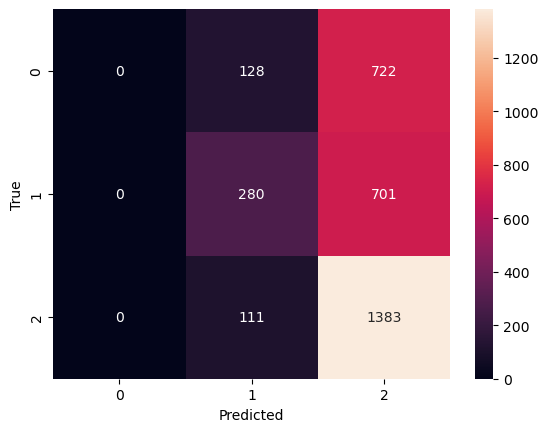

In [619]:
actual_classes = results_df.loc[:, 'Actual_value']
predicted_classes = results_df.loc[:, 'Predicted_value']

print(classification_report(actual_classes, predicted_classes))

# Confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
def append_to_frame():

In [ ]:
#t2
#1. Dataset seperation

In [470]:
df_match_filtered_training['index'] = df_match_filtered_training.index

In [763]:
print(balance_df.columns)

NameError: name 'balance_df' is not defined

In [761]:
if 'Class' in balanced_df.columns:
    balanced_df = balanced_df.drop('Class', axis = 1)
else:
    print("Column 'Class' not found.")


In [422]:
# Custom function to apply to the output
def custom_function(x):
    
    # Define the encoding values for each class (e.g., 0, 1, 2, 3, -1, -2, -3)
    encoding_values = tf.constant([0, 1, 2, -1, -2], dtype=tf.float32)
    
    # Multiply probabilities by corresponding encoding values and sum
    encoding_point = tf.where(encoding_values > 0, 3.0, 
                              tf.where(encoding_values < 0, 0.0, 1.0))
    
    # Calculate weighted expected point
    weighted_expected_point = tf.reduce_sum(class_probabilities * encoding_point, axis=1)
    
    expected_encoded_value = np.argmax(class_probabilities)
    if expected_encoded_value > 0:
        expected_point = 3
    elif expected_encoded_value < 0:
        expected_point = 0
    else:
        expected_point = 1
    weighted_expected_goal_diff = tf.reduce_sum(class_probabilities * encoding_values, axis=1)
    expected_goal = expected_encoded_value
    
    return weighted_expected_point, weighted_expected_goal, expected_goal, expected_point

a = tf.Variable(0.5, trainable=True, dtype=tf.float32, name="trainable_a")

def custom_rnn_transformation(rnn_out, days):
    value = rnn_out * (1 - a/(1+days))
    return value


In [566]:
def prepare_next_match_inputs(training_set, current_match, next_match, teamID, next_match_input, next_match_input_last_form):
    next_match['raw_store_form'] = next_match_input_last_form
    next_match['raw_store_input'] = next_match_input
    frame = dataframes[teamID]
    match_index = frame.index[frame['6'] == current_match['6']].tolist()  # Ensure match_id column exists
    if match_index:
        current_index = match_index[0]
        if current_index + 1 < len(frame):
            index_in_set = frame.iloc[current_index + 1, 'index']
            training_set.loc[index_in_set] = next_match
            frame.iloc[current_index + 1] = next_match
        else:
            raise ValueError(f"No next match for team {teamID}.")

    

In [488]:
print(df_match_filtered_training)

           0      1      2          3   4                    5        6  \
0      24738  24558  24558  2009/2010   1  2009-07-11 00:00:00   663669   
1      24740  24558  24558  2009/2010   1  2009-07-12 00:00:00   663671   
2      24739  24558  24558  2009/2010   1  2009-07-12 00:00:00   663670   
3      24741  24558  24558  2009/2010   1  2009-07-14 00:00:00   663672   
4      24794  24558  24558  2009/2010   2  2009-07-18 00:00:00   663674   
...      ...    ...    ...        ...  ..                  ...      ...   
15997  12449  10257  10257  2013/2014  38  2014-05-18 00:00:00  1536894   
15998  12454  10257  10257  2013/2014  38  2014-05-18 00:00:00  1536899   
15999  12453  10257  10257  2013/2014  38  2014-05-18 00:00:00  1536898   
16000  12451  10257  10257  2013/2014  38  2014-05-18 00:00:00  1536896   
16001  25589  24558  24558  2013/2014  36  2014-05-18 00:00:00  1471960   

           7      8  9  ...  away_raw_expected_goal_diff  \
0       9930   9956  1  ...            

In [ ]:
#add_column_home/away_last_result, add column home/away current_form, add_home_away_form

In [492]:
#need amendment in the days, input form
matchID = Input(shape=(1,), name = 'matchID')
# Define the inputs
input_a = Input(shape=(5,), name='home_motivation')
input_b = Input(shape=(2,), name='home_tiredness')
input_c = Input(shape=(2,), name='home_form')
additional_input = Input(shape=(2,), name='rating')
home_days_input = Input(shape=(1,), name='home_days')
home_goals_input = Input(shape=(1,), name='home_goals')
last_home_form = Input(shape=(1,), name = 'home_form')
hometeamID = Input(shape=(1,), name = 'homeID')

home_custom_days = Lambda(custom_rnn_transformation, output_shape = (1,))([last_home_form, home_days_input])
home_input_form = Lambda(custom_function, output_shape = (4,))(home_goals_input)

home_form_combined_feature =Concatenate()([home_input_form, input_c, home_custom_days])
# home_tired_ness_combined_feature = merge([input_b, ...])
# First sub-network
x_a = Dense(10, activation='tanh', kernel_regularizer=l2(0.01))(input_a)
x_a = Dense(3, activation='sigmoid', kernel_regularizer=l2(0.01))(x_a)

# Second sub-network
x_b = Dense(4, activation='tanh', kernel_regularizer=l2(0.01))(input_b)
x_b = Dense(2, activation='sigmoid', kernel_regularizer=l2(0.01))(x_b)

# Third sub-network
x_c = Dense(4, activation='tanh', kernel_regularizer=l2(0.01))(input_c)
x_c = Dense(2, activation='sigmoid', kernel_regularizer=l2(0.01))(x_c)

input_d = Input(shape=(5,), name='away_motivation')
input_e = Input(shape=(2,), name='away_tiredness')
input_f = Input(shape=(2,), name='away_form')
away_days_input = Input(shape=(1,), name='away_days')
away_goals_input = Input(shape=(1,), name='away_goals')
last_away_form = Input(shape=(1,), name = 'away_form')
awayteamID = Input(shape=(1,), name = 'awayID')

away_custom_days = Lambda(custom_rnn_transformation, output_shape = (1,))([last_away_form, away_days_input])
away_input_form = Lambda(custom_function, output_shape = (4,))(away_goals_input)

away_form_combined_feature = Concatenate()([away_input_form, input_f, away_custom_days])
# away_tired_ness_combined_feature = merge([input_e, ...])

# First sub-network
x_d = Dense(15, activation='tanh', kernel_regularizer=l2(0.01))(input_d)
x_d = Dense(5, activation='tanh', kernel_regularizer=l2(0.01))(x_d)

# Second sub-network
x_e = Dense(6, activation='tanh', kernel_regularizer=l2(0.01))(input_e)
x_e = Dense(2, activation='tanh', kernel_regularizer=l2(0.01))(x_e)

# Third sub-network
x_f = Dense(6, activation='tanh', kernel_regularizer=l2(0.01))(input_f)
x_f = Dense(2, activation='tanh', kernel_regularizer=l2(0.01))(x_f)

# Concatenate the outputs of the three networks
merged = Concatenate()([x_a, x_b, x_c, x_d, x_e, x_f, additional_input])

# Fully connected layers after custom function
hidden_1 = Dense(20, activation='tanh', kernel_regularizer=l2(0.01))(merged)
hidden_2 = Dense(20, activation='tanh', kernel_regularizer=l2(0.01))(hidden_1)

# Final output layer
output = Dense(5, activation='softmax', kernel_regularizer=l2(0.01))(hidden_2)

# Create the model
model = Model(inputs=[input_a, input_b, input_c, input_d, input_e, input_f, additional_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# For the next match prediction
current_home_match, home_next_match = get_next_match(hometeamID, matchID)
current_away_match, away_next_match = get_next_match(awayteamID, matchID)# Function to get next match data

# Retrieve the stored RNN output for each team
next_match_input_form_home = outputs.get(np.zeros((1, 5)))  
next_match_input_form_away = outputs.get(np.zeros((1, 5))) 

next_match_input_last_form_home = x_c.get(np.zeros((1, 2)))
next_match_input_last_form_away = x_f.get(np.zeros((1, 2)))

# Prepare inputs for the next match
prepare_next_match_inputs(training_set, home_next_match, next_match_input_home, next_match_input_last_form_home)
prepare_next_match_inputs(training_set, away_next_match, next_match_input_away, next_match_input_last_form_away)



Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ home_motivation (InputLayer)  │ (None, 5)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ home_tiredness (InputLayer)   │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ home_form (InputLayer)        │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ away_motivation (InputLayer)  │ (None, 5)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ away_tiredness (InputLayer)   │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ away_form (InputLayer)        │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_304 (Dense)             │ (None, 10)                │              60 │ home_motivation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_306 (Dense)             │ (None, 4)                 │              12 │ home_tiredness[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_308 (Dense)             │ (None, 4)                 │              12 │ home_form[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_310 (Dense)             │ (None, 15)                │              90 │ away_motivation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_312 (Dense)             │ (None, 6)                 │              18 │ away_tiredness[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_314 (Dense)             │ (None, 6)                 │              18 │ away_form[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_305 (Dense)             │ (None, 3)                 │              33 │ dense_304[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_307 (Dense)             │ (None, 2)                 │              10 │ dense_306[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_309 (Dense)             │ (None, 2)                 │              10 │ dense_308[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_311 (Dense)             │ (None, 5)                 │              80 │ dense_310[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_313 (Dense)             │ (None, 2)                 │              14 │ dense_312[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,276 (4.98 KB)

 Trainable params: 1,276 (4.98 KB)

 Non-trainable params: 0 (0.00 B)

ValueError: Team ID <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=homeID> not found in dataframes.

In [ ]:
#Parameter test

In [2]:
def random_values(epilson_min, epilson_max, b_min, b_max, c_min, c_max):
    epilson = random.uniform(epilson_min, epilson_max)
    b = random.uniform(b_min, b_max)
    c = random.uniform(c_min, c_max)
    return epilson, b, c

def get_result(df_match, df_storage, input_epilson, input_b, input_c):
    # Ensure algorithm and convert_table are defined or passed as parameters if needed
    df_check = algorithm(df_match, df_storage, convert_table, 0.2256527, epilson=input_epilson, b=input_b, c=input_c)
    return df_check

def mean_square_error(epilson_min, epilson_max, b_min, b_max, c_min, c_max, df_match, df_storage):
    epilson, b, c = random_values(epilson_min, epilson_max, b_min, b_max, c_min, c_max)
    print(f"Epsilon: {epilson}, b: {b}, c: {c}")

    df_a, df_match = get_result(df_match, df_storage, input_epilson=epilson, input_b=b, input_c=c)

    # Ensure 'Predicted_goal_diff' is available in df_to_check
    df_match['real_result'] = None
    df_match['predicted_result'] = None
    total_squared_error = 0

    # Determine real results
    for index, row in df_match.iterrows():
        if row['6'] > row['7']:
            df_match.at[index, 'real_result'] = 'W'
        elif row['6'] < row['7']:
            df_match.at[index, 'real_result'] = 'L'
        else:
            df_match.at[index, 'real_result'] = 'D'

    # Determine predicted results
    for index, row in df_match.iterrows():
        if float(row['Predicted_goal_diff']) > 0:
            df_match.at[index, 'predicted_result'] = 'W'
        elif float(row['Predicted_goal_diff']) < 0:
            df_match.at[index, 'predicted_result'] = 'L'
        else:
            df_match.at[index, 'predicted_result'] = 'D'

    correct = sum(df_match['predicted_result'] == df_match['real_result'])
    total = len(df_match)
    accuracy = correct / total if total > 0 else 0
    print(f"Accuracy: {accuracy:.2f}")

    # Calculate total squared error
    for index, row in df_match.iterrows():
        squared_error = (row['Predicted_goal_diff'] - row['Real_goal_diff']) ** 2
        total_squared_error += squared_error

    print(f"Total Squared Error: {total_squared_error:.2f}")

    return accuracy, total_squared_error

def iterate_mean_square_error(n, epilson_min, epilson_max, b_min, b_max, c_min, c_max, df_match, df_storage):
    accuracies = []
    squared_errors = []

    for i in range(n):
        df_test = df_storage.copy()
        df_to_check = df_match.copy()
        print(f"\nIteration {i + 1}:")
        accuracy, total_squared_error = mean_square_error(epilson_min, epilson_max, b_min, b_max, c_min, c_max, df_to_check, df_test)
        accuracies.append(accuracy)
        squared_errors.append(total_squared_error)

    print("\nOverall Results:")
    print(f"Average Accuracy: {sum(accuracies) / n:.2f}")
    print(f"Average Total Squared Error: {sum(squared_errors) / n:.2f}")

# Example of how to call the iteration function
# Define df_match and df_storage with valid data before running this
iterate_mean_square_error(10, 0, 0.2, 1.5, 4, 0.005, 0.05, df_match_test, df_storage)


NameError: name 'df_match_test' is not defined

In [ ]:
for index, row in df.iterrows():
    team_name = row['name']
    for i in range(len(df)
    